Files already downloaded and verified


C:\Users\Jack\AppData\Local\Temp\ipykernel_16132\3279371583.py:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ts = torch.tensor(noise_levels, dtype=torch.int, device="cuda")


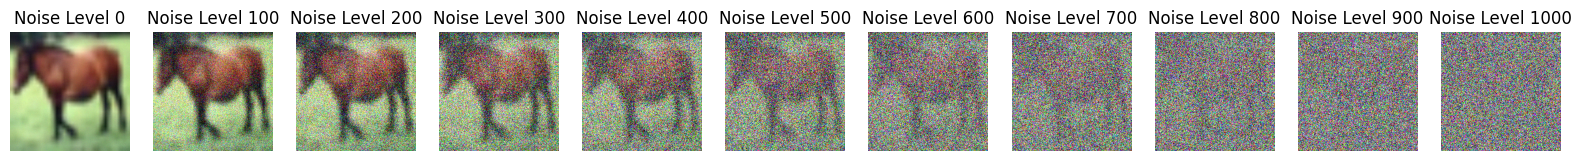

In [6]:
from Diffusion import DiffusionModel

from PIL import Image
import torch
import torchvision
import numpy as np
import math
from torch import nn
from torchvision import transforms
import matplotlib.pyplot as plt

transform = transforms.Compose([
            transforms.Resize(256), 
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # normalize mean and std for n=3 color channels
        ])
training_set = torchvision.datasets.CIFAR10('./data', train=True, transform=transform, download=True)

ddpm = DiffusionModel(noise_schedule="linear",noise_steps=1100).to("cuda")

# How many noise levels to generate
noise_levels = torch.tensor([i for i in range(1100)[::100]])


img = training_set[7][0].to(device="cuda").clone().detach().unsqueeze(0)

batch = img.repeat(len(noise_levels), 1, 1, 1)

ts = torch.tensor(noise_levels, dtype=torch.int, device="cuda")

noise = torch.randn(batch.shape, device="cuda")
noise_imgs = ddpm.add_noise(img, noise, ts)
noise_imgs = noise_imgs.to("cpu")
noise_imgs = (noise_imgs.clamp(-1, 1) + 1) / 2
noise_imgs = (noise_imgs * 255).type(torch.uint8)
noise_imgs = noise_imgs.permute(0, 2, 3, 1)
display_img = Image.fromarray(noise_imgs[8].numpy(), 'RGB')

fig, axs = plt.subplots(1, len(noise_levels), figsize=(20, 5))

for i, ax in enumerate(axs):
    ax.imshow(noise_imgs[i])
    ax.axis('off')
    ax.set_title(f'Noise Level {noise_levels[i]}')

plt.show()


